# Graphics for NAS-Bench-201

With this notebook one can reproduce the plots and tables reported in our paper based on the
precomputed values of `epsinas` metric. These `epsinas` computation can be reproduced from scratch with `Reproduce.ipynb` notebook.

For each type of training and dataset we reproduce the following values:
- global Spearman rank correlation
- top-10% Spearman rank correlation
- global Kendall rank correlation
- top-10% Kendall rank correlation
- number of top-64 scored architectures within top-5% lowest perplexity architectures
- fraction of top-10% scored architectures belonging to top-10% lowest perplexity models

We also build plots for correlations visualisation.

In [13]:
import os
import sys
import pickle as pkl

import numpy as np
import seaborn as sns
from tqdm import tqdm, trange
from scipy import stats

import matplotlib.pyplot as plt
from prettytable import PrettyTable

from epsinas_utils import compute_stats, plot_results

# Epsinas results

In [2]:
# Select the dataset. Choose among: 'cifar10', 'cifar100', 'ImageNet16-120'
dataset = 'cifar10'

### Loading the data

In [3]:
if dataset=='cifar10':
    save_dir = '../epsinas-release-data/NAS-Bench-201/evaluation/CIFAR10'
elif dataset=='cifar100':
    save_dir = '../epsinas-release-data/NAS-Bench-201/evaluation/CIFAR100'
elif dataset=='ImageNet16-120':
    save_dir = '../epsinas-release-data/NAS-Bench-201/evaluation/IMAGENET16-120'

datafile = open(f'{save_dir}/data_NAS-Bench-201_{dataset.upper()}','rb')
while True:
    try:
        d = pkl.load(datafile)
        nparams = d['nparams']
        accs = d['test_accs']
        epsinas = d['scores']
    except EOFError:
        break
datafile.close()

In [4]:
# Titles setup
if dataset=='cifar10':
    title = 'CIFAR-10'
elif dataset=='cifar100':
    title = 'CIFAR-100'
elif dataset=='ImageNet16-120':
    title = 'ImageNet16-120'

## Correlation with accuracy

Here we visualize the correlation between epsinas and the accuracy.

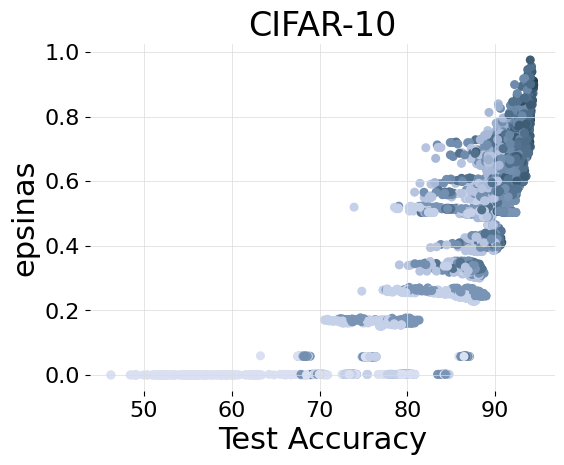

In [8]:
# Colormap
cmap = sns.cubehelix_palette(start=2.6, rot=0.1, hue=0.7, gamma=0.8, dark=0.1, light=0.85, as_cmap=True)

accs = np.array(accs)
epsinas = np.array(epsinas)
epsinas[np.where(epsinas==0.)] = np.nan
label = 'Test Accuracy'

clr = np.log10(nparams)

fig = plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=False)
ax = fig.add_subplot(111)
ax.scatter(accs,
           epsinas,
           s=30,
           c=clr,
           cmap=cmap,
           vmin=np.log10(np.min(nparams)),
           vmax=np.log10(np.max(nparams)),
           alpha=1
            )

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.box(on=None)
plt.grid(color='#dbdbd9', linewidth=0.5)
plt.xlabel(label, fontsize = 22)
plt.ylabel('epsinas', fontsize = 22)
plt.title(title, fontsize=24)

plt.savefig("{0}/epsinas_{1}_global.pdf".format(save_dir, dataset.upper()),
            bbox_inches='tight', 
            dpi=300,
            format='pdf')
plt.show()

## Correlation with number of parameters

Here we visualize the correlations between epsinas and the number of parameters contained within network.

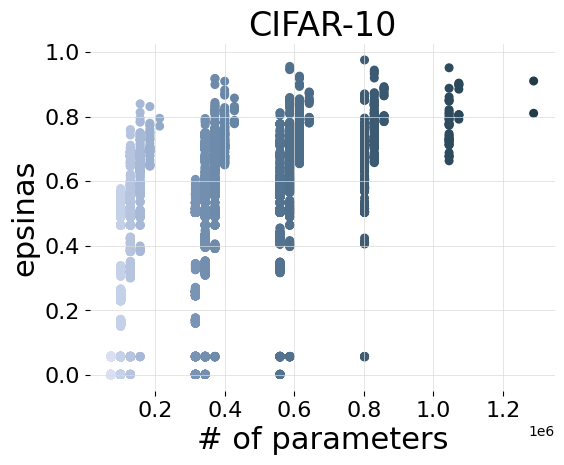

In [9]:
nparams = np.array(nparams)
epsinas = np.array(epsinas)
clr = np.log10(nparams)
epsinas[np.where(epsinas==0.)] = np.nan

fig = plt.figure(figsize=(6,4.5))
plt.rc('text', usetex=False)
ax = fig.add_subplot(111)
ax.scatter(nparams,
           epsinas,
           s=30,
           c=clr,
           cmap=cmap,
           vmin=np.log10(np.min(nparams)),
           vmax=np.log10(np.max(nparams)),
           alpha=1
            )

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

plt.box(on=None)
plt.grid(color='#dbdbd9', linewidth=0.5)
plt.xlabel('# of parameters', fontsize = 22)
plt.ylabel('epsinas', fontsize = 22)
plt.title(title, fontsize=24)

plt.savefig(f"{save_dir}/epsinas_{dataset.upper()}_nparams.pdf",
            bbox_inches='tight', 
            dpi=300,
            format='pdf')
plt.show()

# Other zero-shot metrics

## Correlation with accuracy

Here we visualize the correlations between various zero-shot metrics and the accuracy.

In [11]:
# Load the data from other experiments
synflow = []
grasp = []
snip = []
grad_norm = []
fisher = []
jacov = []
accs_zero = []
if dataset=='cifar10':
    f = open('../zero-cost-nas-release-data/nasbench2/nb2_cf10_seed42_dlrandom_dlinfo1_initwnone_initbnone.p','rb')
elif dataset=='cifar100':
    f = open('../zero-cost-nas-release-data/nasbench2/nb2_cf100_seed42_dlrandom_dlinfo1_initwnone_initbnone.p','rb')
elif dataset=='ImageNet16-120':
    f = open('../zero-cost-nas-release-data/nasbench2/nb2_im120_seed42_dlrandom_dlinfo1_initwnone_initbnone.p','rb')
while(1):
    try:
        d = pkl.load(f)
        synflow.append(d['logmeasures']['synflow'])
        grasp.append(d['logmeasures']['grasp'])
        snip.append(d['logmeasures']['snip'])
        grad_norm.append(d['logmeasures']['grad_norm'])
        fisher.append(d['logmeasures']['fisher'])
        jacov.append(d['logmeasures']['jacob_cov'])
        accs_zero.append(d['testacc'])
    except EOFError:
        break
f.close()

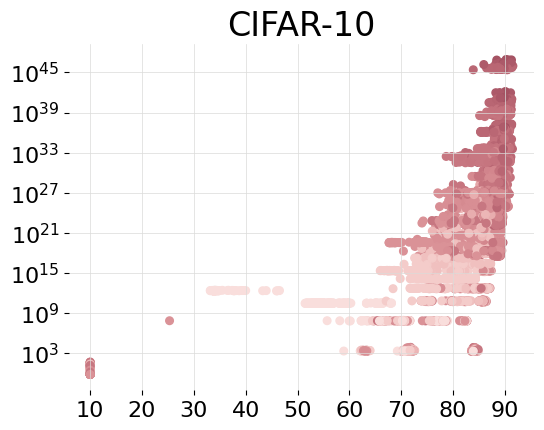

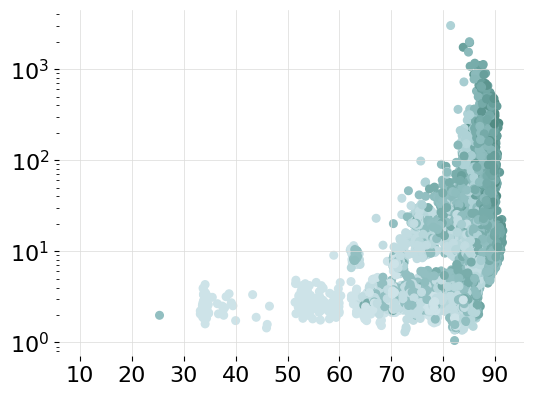

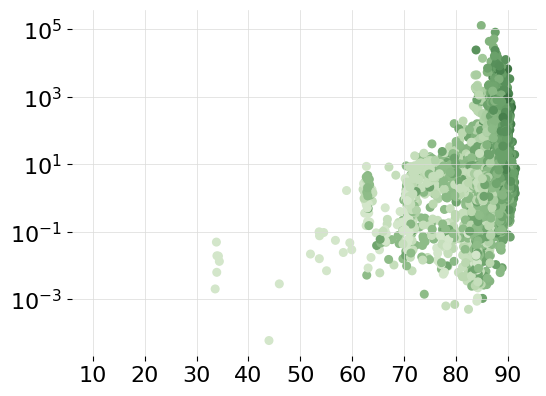

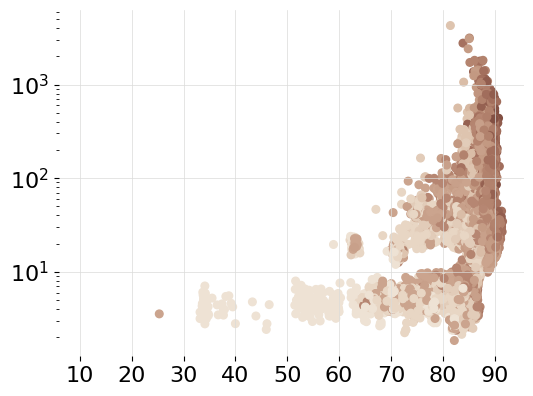

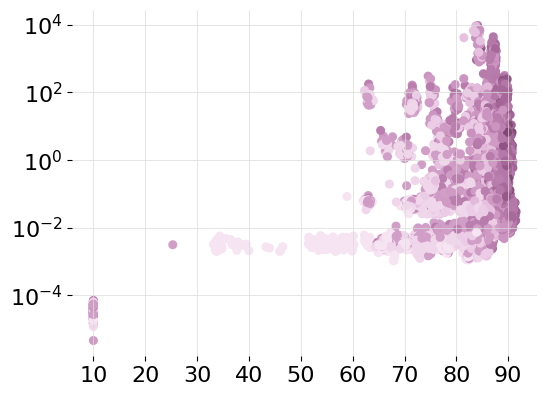

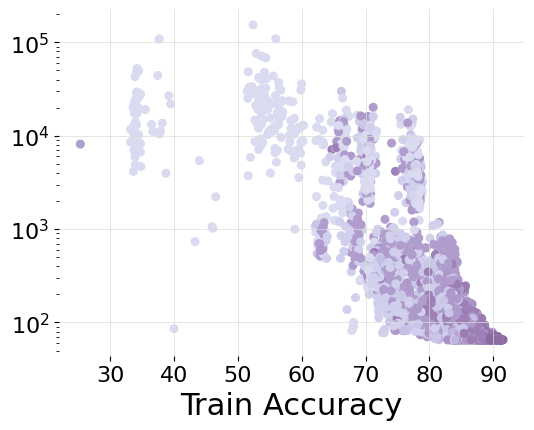

In [8]:
metrics = ['synflow', 'grad_norm', 'grasp', 'snip', 'fisher', 'jacov']

if dataset=='cifar10':
    title = 'CIFAR-10'
elif dataset=='cifar100':
    title = 'CIFAR-100'
else:
    title = dataset
label = 'Train Accuracy'

for metric in metrics:
    if metric == 'synflow':
        score = np.array(synflow)
        cmap = sns.cubehelix_palette(start=0.7, rot=0.1, hue=1.,dark=0.4, light=.90, as_cmap=True) # brick
    elif metric == 'grad_norm':
        score = np.array(grad_norm)
        cmap = sns.cubehelix_palette(start=-0.7, rot=0.1, hue = 0.7, gamma=0.5, dark=0.2, light=.75, as_cmap=True) # sky blue
    elif metric == 'grasp':
        score = np.array(grasp)
        cmap = sns.cubehelix_palette(start=2, rot=-0.1, hue=0.8, dark=0.1, gamma=0.5, light=.75, as_cmap=True) # green
    elif metric == 'snip':
        score = np.array(snip)
        cmap = sns.cubehelix_palette(start=1, rot=0.1, hue=0.8, gamma=0.5, dark=0.1, light=.8, as_cmap=True) # coffee
    elif metric == 'fisher':
        score = np.array(fisher)
        cmap = sns.cubehelix_palette(start=0.5, rot=0.0, hue=.8, gamma=0.5, dark=0.1, light=.85, as_cmap=True) # pink
    elif metric == 'jacov':
        score = -np.array(jacov)
        cmap = sns.cubehelix_palette(start=0.4, rot=-0.2, hue=.7, gamma=0.5, dark=0.1, light=.75, as_cmap=True) # lavender
    
    nparams_plt = np.array(nparams)
    score_plt = np.array(score)
    acc_plt = np.array(accs_zero)
    clr = np.log10(nparams_plt)

    fig = plt.figure(figsize=(6,4.5))
    plt.rc('text', usetex=False)
    ax = fig.add_subplot(111)
    ax.scatter(acc_plt,
               score_plt,
               s=30,
               c=clr,
               cmap=cmap,
               vmin=np.log10(np.min(nparams)),
               vmax=np.log10(np.max(nparams)),
               alpha=1
                )
    if metric!='epsinas':
        ax.set_yscale('log')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

    plt.box(on=None)

    plt.grid(color='#dbdbd9', linewidth=0.5)
    if metric=='jacov':
        plt.xlabel(label, fontsize = 22)
    if dataset=='CIFAR10':
        plt.ylabel(metric, fontsize = 22)
    if metric=='synflow':
        plt.title(title, fontsize=24)
        
#     plt.savefig(f"{save_dir}/{metric}_{dataset.upper()}_global.pdf",
#                 bbox_inches='tight', 
#                 dpi=300,
#                 format='pdf')
    plt.show()

Similar plots for the correlation with the number of parameters

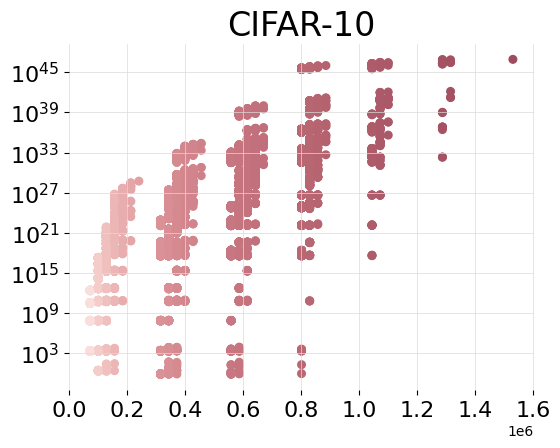

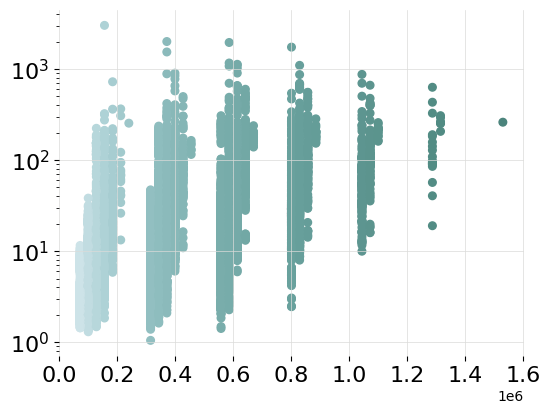

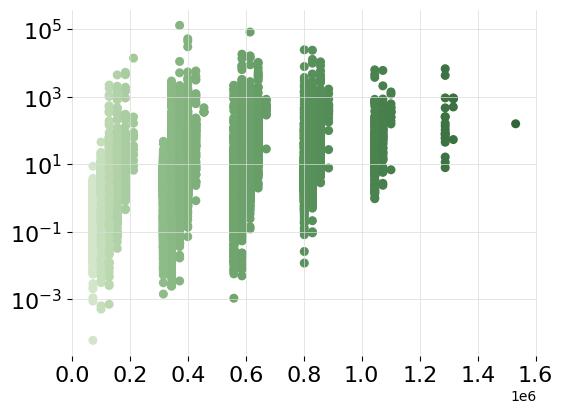

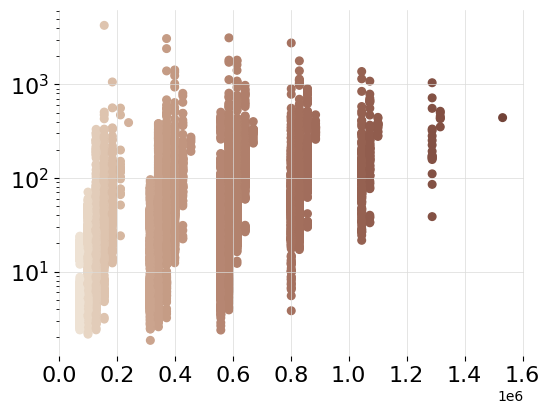

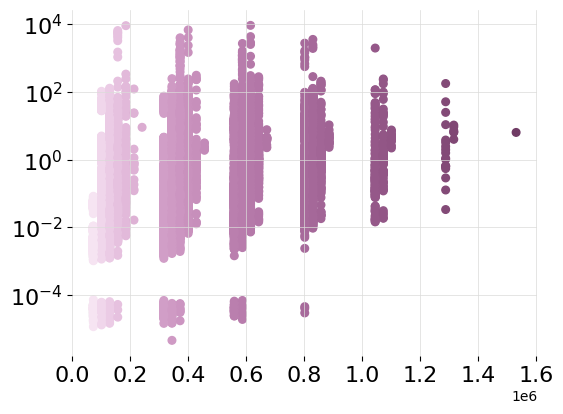

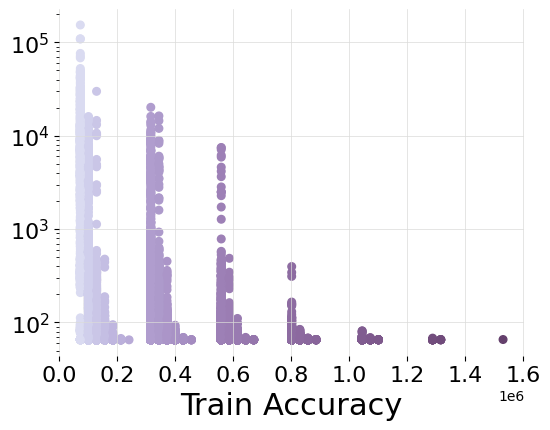

In [9]:
metrics = ['synflow', 'grad_norm', 'grasp', 'snip', 'fisher', 'jacov']

if dataset=='cifar10':
    title = 'CIFAR-10'
elif dataset=='cifar100':
    title = 'CIFAR-100'
else:
    title = dataset
label = 'Train Accuracy'

for metric in metrics:
    if metric == 'synflow':
        score = np.array(synflow)
        cmap = sns.cubehelix_palette(start=0.7, rot=0.1, hue=1.,dark=0.4, light=.90, as_cmap=True) # brick
    elif metric == 'grad_norm':
        score = np.array(grad_norm)
        cmap = sns.cubehelix_palette(start=-0.7, rot=0.1, hue = 0.7, gamma=0.5, dark=0.2, light=.75, as_cmap=True) # sky blue
    elif metric == 'grasp':
        score = np.array(grasp)
        cmap = sns.cubehelix_palette(start=2, rot=-0.1, hue=0.8, dark=0.1, gamma=0.5, light=.75, as_cmap=True) # green
    elif metric == 'snip':
        score = np.array(snip)
        cmap = sns.cubehelix_palette(start=1, rot=0.1, hue=0.8, gamma=0.5, dark=0.1, light=.8, as_cmap=True) # coffee
    elif metric == 'fisher':
        score = np.array(fisher)
        cmap = sns.cubehelix_palette(start=0.5, rot=0.0, hue=.8, gamma=0.5, dark=0.1, light=.85, as_cmap=True) # pink
    elif metric == 'jacov':
        score = -np.array(jacov)
        cmap = sns.cubehelix_palette(start=0.4, rot=-0.2, hue=.7, gamma=0.5, dark=0.1, light=.75, as_cmap=True) # lavender
    
    nparams_plt = np.array(nparams)
    score_plt = np.array(score)
    acc_plt = np.array(accs_zero)
    clr = np.log10(nparams_plt)

    fig = plt.figure(figsize=(6,4.5))
    plt.rc('text', usetex=False)
    ax = fig.add_subplot(111)
    ax.scatter(nparams_plt,
               score_plt,
               s=30,
               c=clr,
               cmap=cmap,
               vmin=np.log10(np.min(nparams)),
               vmax=np.log10(np.max(nparams)),
               alpha=1
                )
    if metric!='epsinas':
        ax.set_yscale('log')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

    plt.box(on=None)

    plt.grid(color='#dbdbd9', linewidth=0.5)
    if metric=='jacov':
        plt.xlabel(label, fontsize = 22)
    if dataset=='CIFAR10':
        plt.ylabel(metric, fontsize = 22)
    if metric=='synflow':
        plt.title(title, fontsize=24)
        
#     plt.savefig(f"{save_dir}/{metric}_{dataset.upper()}_nparams.pdf",
#                 bbox_inches='tight', 
#                 dpi=300,
#                 format='pdf')
    plt.show()

# Tables

Here we compute the statistics presented in Table 2 of the paper.

In [5]:
# Load the data from other experiments
synflow = []
grasp = []
snip = []
grad_norm = []
fisher = []
jacov = []
accs_zero = []
if dataset=='cifar10':
    f = open('../zero-cost-nas-release-data/nasbench2/nb2_cf10_seed42_dlrandom_dlinfo1_initwnone_initbnone.p','rb')
elif dataset=='cifar100':
    f = open('../zero-cost-nas-release-data/nasbench2/nb2_cf100_seed42_dlrandom_dlinfo1_initwnone_initbnone.p','rb')
elif dataset=='ImageNet16-120':
    f = open('../zero-cost-nas-release-data/nasbench2/nb2_im120_seed42_dlrandom_dlinfo1_initwnone_initbnone.p','rb')
while(1):
    try:
        d = pkl.load(f)
        synflow.append(d['logmeasures']['synflow'])
        grasp.append(d['logmeasures']['grasp'])
        snip.append(d['logmeasures']['snip'])
        grad_norm.append(d['logmeasures']['grad_norm'])
        fisher.append(d['logmeasures']['fisher'])
        jacov.append(d['logmeasures']['jacob_cov'])
        accs_zero.append(d['testacc'])
    except EOFError:
        break
f.close()

In [6]:
from epsinas_utils import steiger_z_test

metrics = [synflow, grad_norm, grasp, snip, fisher, jacov, epsinas]
metric_names = ["synflow", "grad_norm", "grasp", "snip", "fisher", "jacov"]

# Find out where all of the metrics are not resulting in NaNs for fair comparison on the exactly same data
nonan = ~np.isnan(epsinas) & ~np.isnan(synflow) & ~np.isnan(grasp) & ~np.isnan(snip)& ~np.isnan(jacov) & ~np.isnan(grad_norm) & ~np.isnan(fisher) & ~np.isnan(accs)
remain_arch_num = sum(nonan)

headers = ["Metric", "Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
table = PrettyTable(headers)

accs_nonan = np.array(accs)[nonan]
accs_zero_nonan = np.array(accs_zero)[nonan]
epsinas_nonan = np.array(epsinas)[nonan]
epsinas_accs_corr, _ = compute_stats(epsinas, accs, False)
table.add_row(["epsinas"] + epsinas_accs_corr)

print("Two-tailed p-value based on the Steiger's Z-test.")
print("Metric name: p-value")

for metric_name, metric in zip(metric_names, metrics):

    metric = np.array(metric)#[nonan]

    # Computing the general metric stats for the table
    metric_accs_corr, _ = compute_stats(metric, accs_zero, False)
    
    # Computing the stats for the data in common with epsinas.
    # Some architectures have NaN epsinas score due to division by zero.
    # To compute the p-values we need to compute the correlations
    # between metrics and epsinas, hence they must have the same length.
    metric_nonan = metric[nonan]
    metric_accs_corr_nonan, _ = compute_stats(metric_nonan, accs_nonan, False)
    metric_eps_corr, _ = compute_stats(metric_nonan, epsinas_nonan, False)
    
    if metric_name!='epsinas':
        _, pval = steiger_z_test(float(metric_accs_corr[0]), float(epsinas_accs_corr[0]), float(metric_eps_corr[0]), remain_arch_num)
        print(f"{str(metric_name)}: {pval}")
    
    table.add_row([metric_name] + metric_accs_corr)

Two-tailed p-value based on the Steiger's Z-test.
Metric name: p-value
synflow: 0.0
grad_norm: 0.0
grasp: 0.0
snip: 0.0
fisher: 0.0
jacov: 0.0


In [8]:
metrics = [synflow, grad_norm, grasp, snip, fisher, jacov]
metric_names = ["synflow", "grad_norm", "grasp", "snip", "fisher", "jacov"]

headers = ["Metric", "Spearman (global)", "Spearman (top-10%)", "Kendall (global)", "Kendall (top-10%)", "Top-10%/top-10%", "Top-64/top-5%"]
table = PrettyTable(headers)

accs = np.array(accs)
accs_zero = np.array(accs_zero)
epsinas = np.array(epsinas)

for metric_name, metric in zip(metric_names, metrics):
    
    metric = np.array(metric)
    
    # Computing the general metric stats for the table
    metric_accs_corr, _ = compute_stats(metric, accs_zero, False)
    table.add_row([metric_name] + metric_accs_corr)

epsinas_accs_corr, _ = compute_stats(epsinas, accs, reverse=False)
table.add_row(["epsinas"] + epsinas_accs_corr)

In [9]:
table

Metric,Spearman (global),Spearman (top-10%),Kendall (global),Kendall (top-10%),Top-10%/top-10%,Top-64/top-5%
synflow,0.74,0.18,0.54,0.12,45.75,29.00
grad_norm,0.59,-0.36,0.43,-0.21,30.26,1.00
grasp,0.51,-0.35,0.36,-0.21,30.77,3.00
snip,0.60,-0.36,0.44,-0.21,30.65,1.00
fisher,0.36,-0.38,0.26,-0.24,4.99,0.00
jacov,0.73,0.15,0.55,0.10,24.72,11.00
epsinas,0.87,0.50,0.69,0.36,67.06,62.00


## Reproducing Table 3 results

Showing how well does `epsinas` choose one architecture among N=1000, 100.

In [16]:
n_runs = 500
n_samples = 1000
ind_actual_best_mean = 0

times_run = []
chosen = []
accs = []
val_accs = []
topscores = []
opt_test = []
opt_val = []
rand_test = []
rand_val = []

# Read the data
if dataset=='cifar10':
    f = open('../epsinas-release-data/NAS-Bench-201/evaluation/CIFAR10/data_NAS-Bench-201_CIFAR10','rb')
elif dataset=='cifar100':
    f = open('../epsinas-release-data/NAS-Bench-201/evaluation/CIFAR100/data_NAS-Bench-201_CIFAR100','rb')
elif dataset=='ImageNet16-120':
    f = open('../epsinas-release-data/NAS-Bench-201/evaluation/IMAGENET16-120/data_NAS-Bench-201_IMAGENET16-120','rb')
while(1):
    try:
        d = pkl.load(f)
        scores_all = d['scores']
        accs_all = d['test_accs']
        val_accs_all = d['val_accs']
        times = d['times']
    except EOFError:
        break
f.close()
    
# Set up the log file
save_dir = f'../epsinas-release-data/NAS-Bench-201/average_performance/{dataset.upper()}'
os.makedirs(save_dir, exist_ok=True)
logs_filename = f'{save_dir}/epsinas_logs_{dataset.upper()}_{n_samples}samples.txt'

with open(logs_filename, 'w') as logs:
    runs = trange(n_runs, desc='acc: ')
    for N in runs:
        scores_run = []
        accs_run = []
        nparams = []
        time_run = 0
        np.random.seed(N)
        indices = np.random.randint(0, len(accs_all), n_samples)
        for i in indices:
            scores_run.append(scores_all[i])
            accs_run.append(accs_all[i])
            time_run += times[i]
            
        # Computing optimal, random accuracies
        opt_test.append(np.nanmax(accs_run))
        opt_val.append(val_accs_all[indices[np.nanargmax(accs_run)]])
        rand_test.append(accs_run[0])
        rand_val.append(val_accs_all[indices[0]])
        
        accs_run.sort(reverse=True)
        best_arch = indices[np.nanargmax(scores_run)]
        ind_actual_best = accs_run.index(accs_all[best_arch])
        ind_actual_best_mean += ind_actual_best

        topscores.append(np.nanmax(scores_run))
        chosen.append(best_arch)
        accs.append(accs_all[best_arch])
        val_accs.append(val_accs_all[best_arch])        
        
        logs.write(f"Mean acc: {np.mean(accs):.2f}% ")
        logs.write(f"Actual ranking: {ind_actual_best} \n")
        times_run.append(time_run)
        runs.set_description(f"mean acc: {np.mean(accs):.2f}%, mean rank: {ind_actual_best_mean/(N+1):.2f}")

    logs.write(f"Average chosen architecure's rank: {ind_actual_best_mean/n_runs} \n")
    logs.write(f"Final mean test accuracy: {np.mean(accs)} +- {np.std(accs)} \n")
    logs.write(f"Median duration: {np.median(times_run)} \n")
    logs.write(f"Final mean validation accuracy: {np.mean(val_accs)} +- {np.std(val_accs)} \n\n")
    logs.write(f"Final mean optimal test accuracy: {np.mean(opt_test)} +- {np.std(opt_test)} \n")
    logs.write(f"Final mean optimal validation accuracy: {np.mean(opt_val)} +- {np.std(opt_val)} \n")
    
    logs.write(f"Final mean random test accuracy: {np.mean(rand_test)} +- {np.std(rand_test)} \n")
    logs.write(f"Final mean random validation accuracy: {np.mean(rand_val)} +- {np.std(rand_val)} \n")

mean acc: 93.86%, mean rank: 17.21: 100%|████| 500/500 [00:01<00:00, 399.56it/s]
